# Data Set Information:

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

In [1]:
import numpy as np
import pandas as pd
# import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , confusion_matrix , classification_report
from sklearn.ensemble import  RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler , PowerTransformer , MinMaxScaler , StandardScaler , LabelEncoder , Normalizer , MaxAbsScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,VotingClassifier,\
GradientBoostingClassifier,StackingClassifier,VotingClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE, ADASYN,BorderlineSMOTE,KMeansSMOTE,SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# read train_dataset

In [2]:
df=pd.read_csv("../input/dry-beans-classification-iti-ai-pro-intake02/train.csv",index_col='ID')

In [3]:
# create a copy of the file.
data=df.copy()

In [4]:
data.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA
5,34771,683.109,230.586519,192.185558,1.199812,0.552574,35163,210.408679,0.783978,0.988852,0.936369,0.912493,0.006632,0.002836,0.832644,0.999016,SEKER
6,45817,862.123,333.458920,175.910473,1.895617,0.849535,46654,241.528500,0.757932,0.982059,0.774637,0.724313,0.007278,0.001236,0.524629,0.994495,HOROZ
7,38449,746.242,284.788951,172.925734,1.646886,0.794544,38944,221.257287,0.804878,0.987289,0.867632,0.776917,0.007407,0.001665,0.603600,0.994060,SIRA
8,38396,709.443,250.380456,195.738890,1.279155,0.623572,38723,221.104739,0.748431,0.991555,0.958652,0.883075,0.006521,0.002446,0.779822,0.997513,SEKER


# Attribute Information:

* **Area (A)**: The area of a bean zone and the number of pixels within its boundaries.
* **Perimeter (P)**: Bean circumference is defined as the length of its border.
* **Major axis length (L)**: The distance between the ends of the longest line that can be drawn from a bean.
* **Minor axis length (l)**: The longest line that can be drawn from the bean while standing perpendicular to the main axis.
* **Aspect ratio (K)**: Defines the relationship between L and l.
* **Eccentricity (Ec)**: Eccentricity of the ellipse having the same moments as the region.
* **Convex area (C)**: Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
* **Equivalent diameter (Ed)**: The diameter of a circle having the same area as a bean seed area.
* **Extent (Ex)**: The ratio of the pixels in the bounding box to the bean area.
* **Solidity (S)**: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
* **Roundness (R)**: Calculated with the following formula: (4piA)/(P^2)
* **Compactness (CO)**: Measures the roundness of an object: Ed/L
* **ShapeFactor1 (SF1)**
* **ShapeFactor2 (SF2)**
* **ShapeFactor3 (SF3)**
* **ShapeFactor4 (SF4)**
* **Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)**

# Class Exploration

In [5]:
print(data['y'].unique())

['HOROZ' 'SEKER' 'DERMASON' 'SIRA' 'BARBUNYA' 'CALI' 'BOMBAY']


<img src="https://i.postimg.cc/vb5PhqNM/visualsupdated.png"/>

In [6]:
# check the number of columns and rows
print("Data set contains {a} rows and {b} columns".format(a=data.shape[0],b=data.shape[1]))
# print("the shape of training_data is : ",data.shape)

Data set contains 10834 rows and 17 columns


# Exploratory data analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  object 
dtypes: float64(1

In [8]:
df.y = df.y.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Area             10834 non-null  int64   
 1   Perimeter        10834 non-null  float64 
 2   MajorAxisLength  10834 non-null  float64 
 3   MinorAxisLength  10834 non-null  float64 
 4   AspectRation     10834 non-null  float64 
 5   Eccentricity     10834 non-null  float64 
 6   ConvexArea       10834 non-null  int64   
 7   EquivDiameter    10834 non-null  float64 
 8   Extent           10834 non-null  float64 
 9   Solidity         10834 non-null  float64 
 10  roundness        10834 non-null  float64 
 11  Compactness      10834 non-null  float64 
 12  ShapeFactor1     10834 non-null  float64 
 13  ShapeFactor2     10834 non-null  float64 
 14  ShapeFactor3     10834 non-null  float64 
 15  ShapeFactor4     10834 non-null  float64 
 16  y                10834 non-null  categor

In [9]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,10834.0,53095.675189,29542.542580,20420.000000,36343.500000,44645.000000,61295.000000,254616.000000
Perimeter,10834.0,855.274892,214.991122,524.932000,703.601250,793.739500,975.517500,1985.370000
MajorAxisLength,10834.0,320.036169,85.961630,183.601165,253.501071,296.377365,376.068399,738.860153
MinorAxisLength,10834.0,202.410342,45.113965,129.576207,175.927024,192.525040,217.315195,450.926187
AspectRation,10834.0,1.581294,0.244314,1.024868,1.432985,1.550761,1.703029,2.388873
Eccentricity,10834.0,0.750588,0.091481,0.218951,0.716250,0.764314,0.809450,0.908167
ConvexArea,10834.0,53816.205926,29999.710739,20684.000000,36731.250000,45148.000000,62251.500000,263261.000000
EquivDiameter,10834.0,253.123583,59.433080,161.243764,215.113880,238.419335,279.362162,569.374358
Extent,10834.0,0.749937,0.048949,0.555315,0.718778,0.760141,0.786871,0.866195
Solidity,10834.0,0.987152,0.004626,0.919246,0.985627,0.988290,0.990014,0.994677


In [11]:
df1=data[data['y']=='HOROZ']
df2=data[data['y']=='SEKER']
df3=data[data['y']=='DERMASON']
df4=data[data['y']=='SIRA']
df5=data[data['y']=='BARBUNYA']
df6=data[data['y']=='CALI']
df7=data[data['y']=='BOMBAY']

In [12]:
dfs=[df1,df2,df3,df4,df5,df6,df7]
for i in dfs:
    print(i['y'].unique())
    display(i.describe().T)

['HOROZ']


,count,mean,std,min,25%,50%,75%,max
Area,1488.0,53621.056452,7331.434249,33263.000000,48882.250000,53777.000000,58421.250000,81929.000000
Perimeter,1488.0,919.560155,70.281609,689.294000,877.292500,921.395500,965.075500,1162.588000
MajorAxisLength,1488.0,372.380849,30.374371,264.630743,356.269876,374.783402,391.147621,456.758154
MinorAxisLength,1488.0,184.168612,13.357369,148.167484,175.074409,183.836913,193.332505,237.899946
AspectRation,1488.0,2.024993,0.136411,1.462019,1.945729,2.031860,2.115267,2.388873
Eccentricity,1488.0,0.867238,0.021386,0.729496,0.857822,0.870505,0.881195,0.908167
ConvexArea,1488.0,54406.622312,7440.111236,33892.000000,49609.750000,54526.500000,59282.750000,83019.000000
EquivDiameter,1488.0,260.666343,18.047882,205.795449,249.477080,261.669643,272.734753,322.978703
Extent,1488.0,0.705175,0.075159,0.555315,0.636327,0.701406,0.776824,0.866195
Solidity,1488.0,0.985576,0.005866,0.944568,0.984754,0.987005,0.988622,0.992798


['SEKER']


,count,mean,std,min,25%,50%,75%,max
Area,1621.0,39966.113510,4856.696876,28395.000000,36463.000000,39202.000000,42749.000000,61150.000000
Perimeter,1621.0,728.639407,48.905528,610.291000,693.059000,721.543000,755.940000,933.372000
MajorAxisLength,1621.0,251.701676,20.220738,200.524796,237.386827,249.177437,263.351276,339.931533
MinorAxisLength,1621.0,201.998695,11.098162,171.210559,194.084494,200.353567,208.769629,252.287649
AspectRation,1621.0,1.246667,0.082991,1.024868,1.192692,1.237435,1.289020,1.679979
Eccentricity,1621.0,0.585945,0.071724,0.218951,0.544995,0.589013,0.630999,0.803544
ConvexArea,1621.0,40356.480568,4903.014571,28715.000000,36825.000000,39567.000000,43131.000000,61640.000000
EquivDiameter,1621.0,225.177160,13.483130,190.141097,215.467245,223.413376,233.301773,279.031536
Extent,1621.0,0.771686,0.018906,0.671871,0.760201,0.774296,0.784746,0.826104
Solidity,1621.0,0.990323,0.003178,0.919246,0.989501,0.990950,0.991960,0.994082


['DERMASON']


,count,mean,std,min,25%,50%,75%,max
Area,2837.0,32197.808601,4676.539286,20420.000000,28654.000000,31966.000000,35660.000000,42159.000000
Perimeter,2837.0,666.160614,50.495187,524.932000,629.561000,665.248000,703.664000,908.265000
MajorAxisLength,2837.0,246.902856,20.688208,183.601165,231.927096,246.658741,261.565812,308.262336
MinorAxisLength,2837.0,165.832284,12.513679,129.576207,156.778177,165.938045,175.298702,199.153179
AspectRation,2837.0,1.490935,0.096173,1.190922,1.426308,1.484028,1.551294,1.965673
Eccentricity,2837.0,0.736859,0.040038,0.543073,0.713052,0.738876,0.764500,0.860925
ConvexArea,2837.0,32578.775467,4711.345487,20684.000000,29030.000000,32346.000000,36056.000000,42667.000000
EquivDiameter,2837.0,201.934210,14.770748,161.243764,191.006298,201.743340,213.081492,231.686223
Extent,2837.0,0.752885,0.037449,0.652881,0.721655,0.754358,0.785047,0.852841
Solidity,2837.0,0.988218,0.003000,0.946634,0.987325,0.988727,0.989862,0.993629


['SIRA']


,count,mean,std,min,25%,50%,75%,max
Area,2109.0,44712.792793,4565.500512,31519.000000,41565.000000,44591.000000,47767.000000,63612.000000
Perimeter,2109.0,796.230031,44.572266,668.106000,765.979000,794.368000,825.869000,984.282000
MajorAxisLength,2109.0,299.294500,20.757204,233.804968,285.037774,298.193007,313.146018,400.931467
MinorAxisLength,2109.0,190.774824,9.196401,157.802740,184.918962,191.002940,197.036412,224.729309
AspectRation,2109.0,1.569822,0.095906,1.259251,1.504058,1.561117,1.628937,2.006989
Eccentricity,2109.0,0.767235,0.032584,0.607757,0.746961,0.767902,0.789386,0.867028
ConvexArea,2109.0,45256.706022,4615.799961,32065.000000,42093.000000,45122.000000,48361.000000,64581.000000
EquivDiameter,2109.0,238.289177,12.183371,200.327824,230.048259,238.275103,246.614747,284.593243
Extent,2109.0,0.749626,0.044413,0.627527,0.711219,0.752663,0.789365,0.835327
Solidity,2109.0,0.987971,0.002798,0.969256,0.986883,0.988548,0.989778,0.992717


['BARBUNYA']


,count,mean,std,min,25%,50%,75%,max
Area,1057.0,69673.259224,10236.328007,41488.000000,62831.000000,69509.000000,76098.000000,105542.000000
Perimeter,1057.0,1044.961395,89.748831,759.552000,988.076000,1043.643000,1101.834000,1338.893000
MajorAxisLength,1057.0,369.943828,32.397344,266.700396,348.145910,369.458839,392.550268,483.691256
MinorAxisLength,1057.0,239.931629,19.566263,185.657600,226.706349,239.516479,252.656933,295.713214
AspectRation,1057.0,1.546140,0.124621,1.135792,1.466019,1.549647,1.630251,1.950371
Eccentricity,1057.0,0.755427,0.049874,0.474152,0.731241,0.763922,0.789770,0.858554
ConvexArea,1057.0,70896.676443,10421.020741,42005.000000,63945.000000,70724.000000,77435.000000,107112.000000
EquivDiameter,1057.0,297.034177,21.952277,229.835076,282.840792,297.492197,311.273164,366.579116
Extent,1057.0,0.749779,0.040514,0.639787,0.716571,0.751011,0.783168,0.840577
Solidity,1057.0,0.982758,0.004056,0.961840,0.980607,0.983035,0.985427,0.992549


['CALI']


,count,mean,std,min,25%,50%,75%,max
Area,1304.0,75440.769939,9444.316811,45504.000000,69089.250000,74641.500000,81403.000000,116272.000000
Perimeter,1304.0,1056.743706,68.183166,789.770000,1014.042500,1054.177500,1101.476000,1326.583000
MajorAxisLength,1304.0,409.101924,29.899404,274.863357,390.318496,408.122242,428.265987,534.484404
MinorAxisLength,1304.0,236.272249,14.596991,179.834691,226.728431,235.507339,244.986501,291.873017
AspectRation,1304.0,1.732528,0.091205,1.297228,1.675483,1.732188,1.793295,2.008074
Eccentricity,1304.0,0.814531,0.023004,0.636987,0.802358,0.816529,0.830088,0.867183
ConvexArea,1304.0,76588.358896,9583.276139,45972.000000,70214.000000,75742.500000,82594.500000,118144.000000
EquivDiameter,1304.0,309.325305,19.295410,240.702082,296.592589,308.279921,321.940241,384.762405
Extent,1304.0,0.759241,0.041885,0.631988,0.734091,0.766648,0.792768,0.850251
Solidity,1304.0,0.985028,0.005685,0.960667,0.981515,0.986158,0.989448,0.994260


['BOMBAY']


,count,mean,std,min,25%,50%,75%,max
Area,418.0,174644.691388,22940.608097,114004.000000,157937.250000,172856.500000,187630.750000,254616.000000
Perimeter,418.0,1590.797629,114.378978,1265.926000,1510.819750,1591.361500,1659.780750,1985.370000
MajorAxisLength,418.0,595.659564,52.756584,425.923787,561.896391,593.206795,631.702808,738.860153
MinorAxisLength,418.0,375.391936,22.508302,323.747996,359.689993,373.196086,388.677220,450.926187
AspectRation,418.0,1.587750,0.118775,1.212715,1.506043,1.586837,1.656309,1.933856
Eccentricity,418.0,0.771276,0.041032,0.565722,0.747740,0.776445,0.797172,0.855924
ConvexArea,418.0,177005.933014,23472.141932,115298.000000,160031.500000,175301.500000,189987.500000,263261.000000
EquivDiameter,418.0,470.556590,30.712860,380.991340,448.432770,469.135065,488.772841,569.374358
Extent,418.0,0.777878,0.038236,0.607021,0.757506,0.784117,0.806246,0.858420
Solidity,418.0,0.986825,0.005328,0.957261,0.984958,0.988297,0.990276,0.994677


In [13]:
data.loc[data.duplicated(),:].sum()

Area               0.0
Perimeter          0.0
MajorAxisLength    0.0
MinorAxisLength    0.0
AspectRation       0.0
Eccentricity       0.0
ConvexArea         0.0
EquivDiameter      0.0
Extent             0.0
Solidity           0.0
roundness          0.0
Compactness        0.0
ShapeFactor1       0.0
ShapeFactor2       0.0
ShapeFactor3       0.0
ShapeFactor4       0.0
y                  0.0
dtype: float64

In [14]:
# pp.ProfileReport(data)

# Univariate Exploration
            * we will explore each variable distribution

* the Target Distribution 

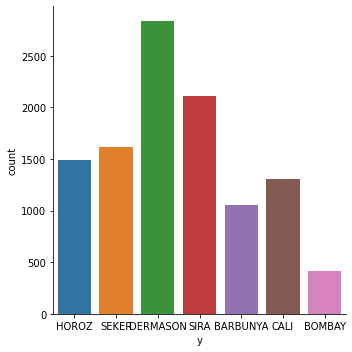

In [15]:
sns.catplot(data = data,x='y',kind='count',orient='v')
plt.show()

In [16]:
# This function takes the numerical column as the input and returns the boxplots and histogram 


def histogram_boxplot(feature, figsize=(10,5)):

    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2,  color='c') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='r', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

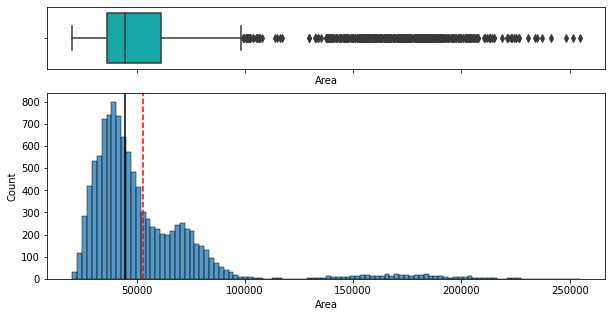

In [17]:
# ditribution of Area
histogram_boxplot(data['Area'])

* we can observe few extreme values after 210000

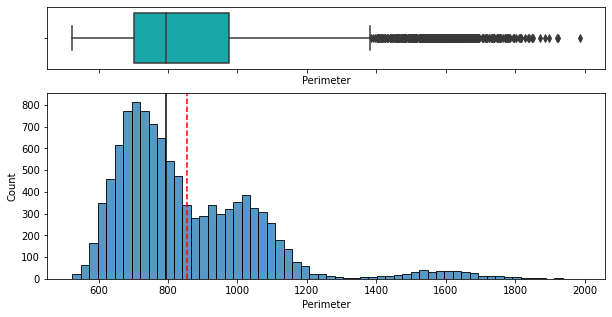

In [18]:
# ditribution of Perimeter
histogram_boxplot(data['Perimeter'])

* We can observe that the Perimeter is right-skewed data with max outliers; from 1900 onwards, we can see few data points having significantly higher values.

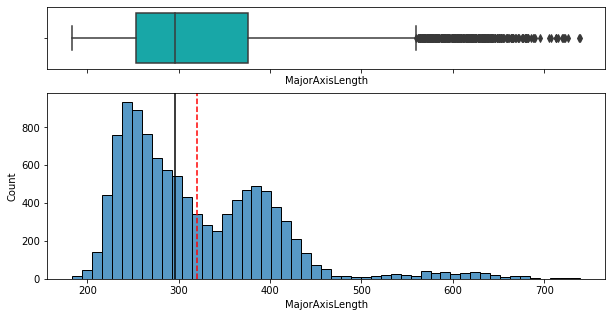

In [19]:
# ditribution of MajorAxisLength
histogram_boxplot(data['MajorAxisLength'])

*  We can observe that the Major Axis Length is right-skewed data with max outliers; from 700 onwards, we can see few data points having significantly higher values

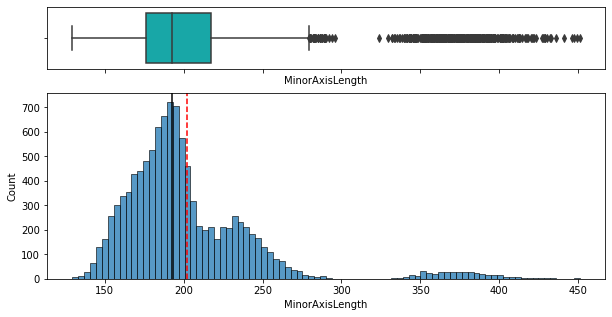

In [20]:
# ditribution of MinorAxisLength
histogram_boxplot(data['MinorAxisLength'])

* We can observe that the Minor Axis Length is right-skewed data with max outliers; from 300 onwards, we can see significantly higher values

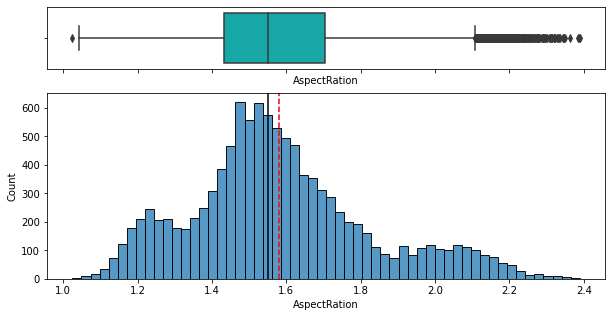

In [21]:
# ditribution of AspectRation
histogram_boxplot(data['AspectRation'])

*  AspectRation we can observe it is normally distributed with max outliers 2 or 3 data points having signicant higher values.

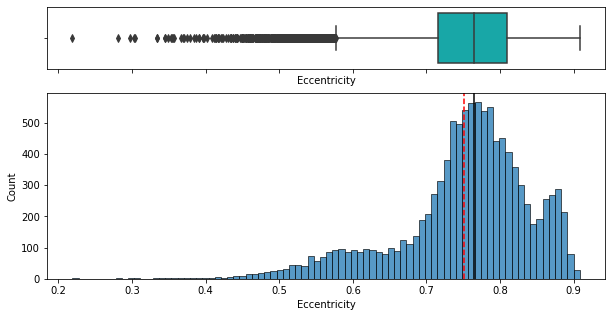

In [22]:
# ditribution of Eccentricity
histogram_boxplot(data['Eccentricity'])

* We can observe that the Eccentricity is left-skewed with minimum outliers; we can see few data points having significantly lesser values (values < 0.35)

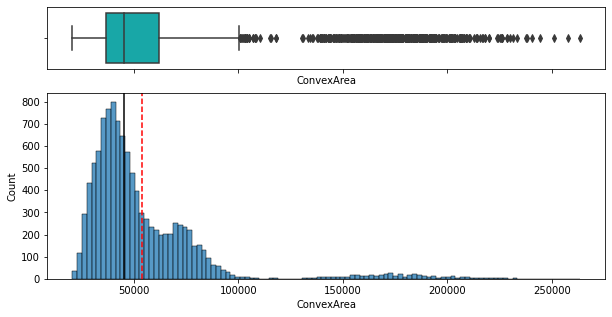

In [23]:
# ditribution of ConvexArea
histogram_boxplot(data['ConvexArea'])

*  We can observe that the ConvexArea is right-skewed data with max outliers; we can see few data points (values > 23000) having significantly higher values.

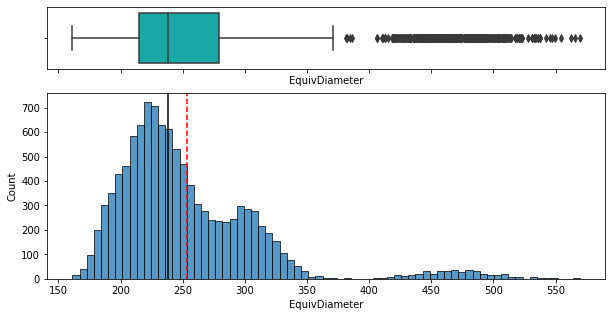

In [24]:
# ditribution of EquivDiameter
histogram_boxplot(data['EquivDiameter'])

* We can observe that the EquivDiameter is right-skewed data with max outliers.

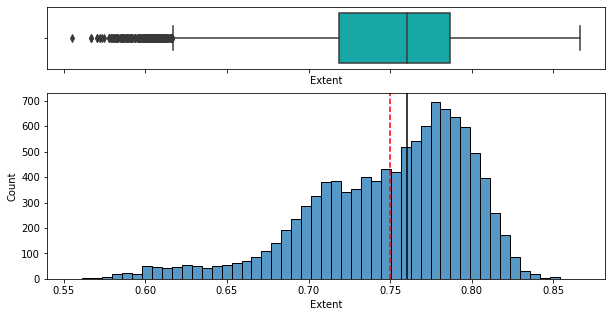

In [25]:
# ditribution of Extent
histogram_boxplot(data['Extent'])

* We can observe that the Extent is left-skewed data with min outliers. 

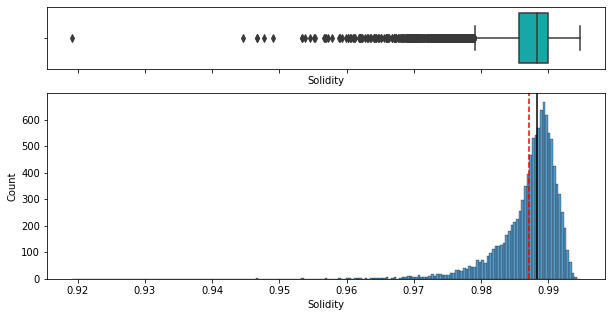

In [26]:
# ditribution of Solidity
histogram_boxplot(data['Solidity'])

* We can observe that the Solidity is left-skewed data with min outliers, we can observe one of the outlier is extremely low.

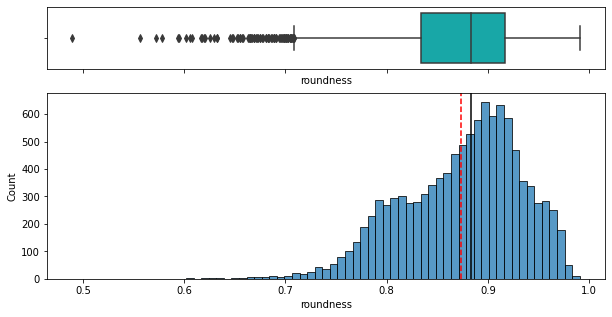

In [27]:
# ditribution of roundness
histogram_boxplot(data['roundness'])

* We can observe that the roundness is left-skewed data with min outliers, we can observe one of the outlier is extremely low.

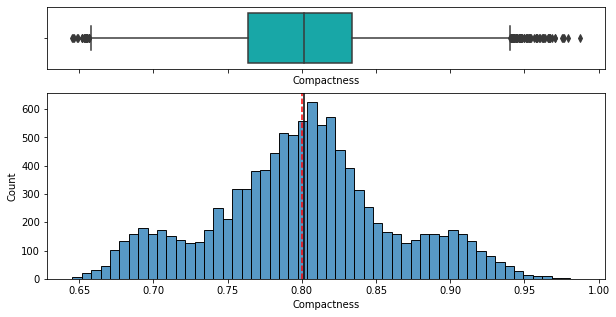

In [28]:
# ditribution of Compactness
histogram_boxplot(data['Compactness'])

 * Compactness we can observe that it is normally distributed with min and max outliers.

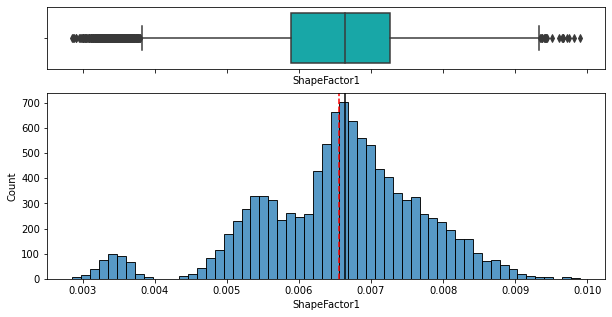

In [29]:
# ditribution of ShapeFactor1
histogram_boxplot(data['ShapeFactor1'])

* Shapefactor 1 is normally distributed with min and max outliers.

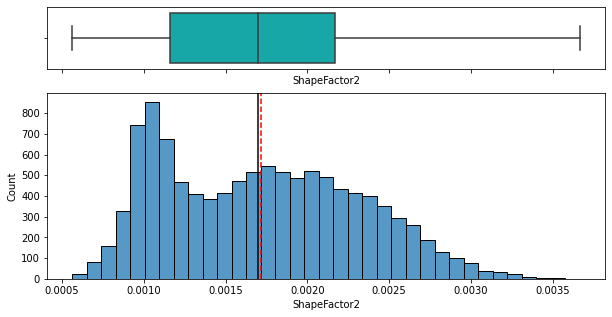

In [30]:
# ditribution of ShapeFactor1
histogram_boxplot(data['ShapeFactor2'])

* ShapeFactor 2 is normally distributed without any outliers.

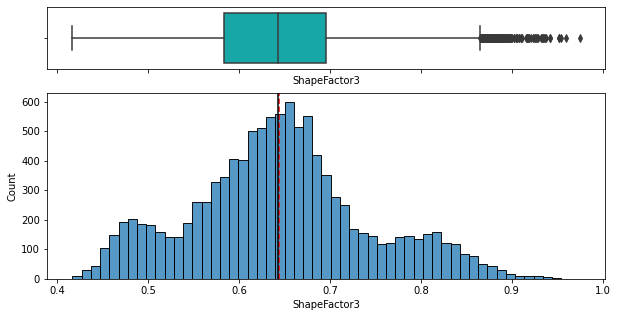

In [31]:
# ditribution of ShapeFactor3
histogram_boxplot(data['ShapeFactor3'])

* ShapeFactor3 is normally distributed wiht max outliers.

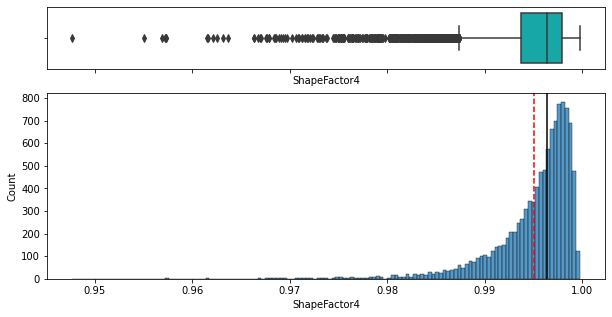

In [32]:
# ditribution of ShapeFactor4
histogram_boxplot(data['ShapeFactor4'])

*  ShapeFactor 4 is extremely left skewed with minimum outliers.

# Checking the Skeweness of the dataset

In [33]:
data.skew(axis=0)

Area               2.970246
Perimeter          1.650773
MajorAxisLength    1.390286
MinorAxisLength    2.251468
AspectRation       0.589186
Eccentricity      -1.075626
ConvexArea         2.960315
EquivDiameter      1.971378
Extent            -0.900892
Solidity          -2.507634
roundness         -0.659566
Compactness        0.038242
ShapeFactor1      -0.544873
ShapeFactor2       0.292677
ShapeFactor3       0.245589
ShapeFactor4      -2.628540
dtype: float64

In [34]:
# # lets check how the each fetaures are realted to each other with hue as Class
# sns.pairplot(data, hue='y')

# see the correlation between numerical variables

<AxesSubplot:>

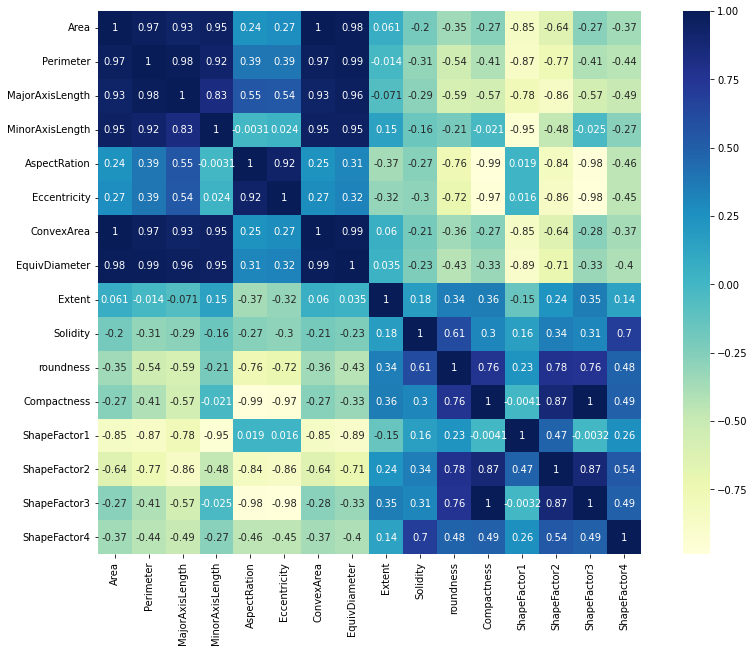

In [35]:
# Apply correlation plot to see the correlation between numerical variables.

plt.figure(figsize=(15,10))
# plt.figure(figsize=(14, 14))
dat_cor = data.corr()
sns.heatmap(dat_cor, cmap = 'YlGnBu', annot=True, square=True)

# Preprocessing for data

In [36]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [37]:
# # creating an instance of label encoder
# labelencoder=LabelEncoder()

# data['y']=labelencoder.fit_transform(data['y'])

data['y'] = data['y'].map({'HOROZ':0, 'SEKER':1, 'DERMASON':2, 'SIRA':3, 'BARBUNYA':4, 'CALI':5, 'BOMBAY':6})

data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,0
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,1
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,2
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,2
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,3


In [38]:
data["y"].unique()

array([0, 1, 2, 3, 4, 5, 6])

# Feature Engineering

In [39]:
# data['ShapeFactor5'] = data['MajorAxisLength'] / data['Perimeter']
# data['Bounding_rectangular_area'] = data['Area']/data['Extent']
# data['elipse_area']= np.pi* data['MajorAxisLength']*data['MinorAxisLength']/4
# data['perimeter']= 2*np.pi * np.sqrt(((0.5*data['MajorAxisLength'])**2+(0.5*data['MinorAxisLength'])**2)/2)
# data['area_diff']= data['elipse_area']-data['Area']
# data['perimeter_diff']= data['perimeter']-data['Perimeter']

In [40]:
x_train=data.drop("y",axis=1)
y_train=data["y"]

In [41]:
x_train.shape

(10834, 16)

In [42]:
y_train.shape

(10834,)

# Treating Imbalanced Data

In [43]:
print(x_train.shape)
print(y_train.shape)
print(y_train.value_counts())
oversample = BorderlineSMOTE(sampling_strategy={2:3000,6:1300,4:1300,1:2000,5:1900},random_state = 465)
x_train,y_train = oversample.fit_resample(x_train,y_train)
print(x_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(10834, 16)
(10834,)
2    2837
3    2109
1    1621
0    1488
5    1304
4    1057
6     418
Name: y, dtype: int64
(13097, 16)
(13097,)
2    3000
3    2109
1    2000
5    1900
0    1488
4    1300
6    1300
Name: y, dtype: int64


In [44]:
dt=x_train.copy()
dt["y"]=y_train
dt.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,0
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,1
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,2
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,2
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,3


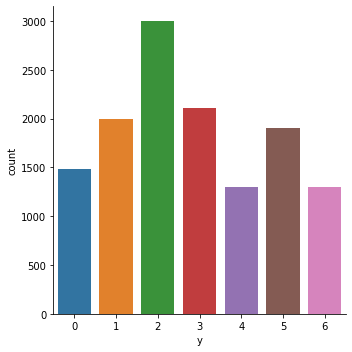

In [45]:
sns.catplot(data = dt,x='y',kind='count',orient='v')
plt.show()

# scaler dataset

In [46]:
power=PowerTransformer()
x_train=power.fit_transform(x_train)
x_train=pd.DataFrame(x_train,columns=dt.columns.drop("y"))

In [47]:
x_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.413823,0.600152,0.885130,-0.375856,2.001553,1.924651,0.412441,0.413862,-2.256128,-0.220451,-1.586207,-1.956998,0.346179,-1.422762,-1.951780,1.246142
1,-0.227893,-0.484723,-0.715682,0.339381,-1.511355,-1.529928,-0.245325,-0.228005,0.362909,2.862272,2.128705,1.503393,-0.354109,1.179096,1.503775,0.604118
2,-1.238398,-1.285712,-1.202817,-1.056468,-0.520365,-0.515127,-1.238409,-1.238430,1.261812,0.065594,1.027009,0.525345,1.038457,1.070093,0.525301,0.783368
3,-0.607994,-0.645647,-0.666590,-0.469563,-0.356091,-0.344661,-0.611452,-0.608130,0.213245,0.288406,0.452026,0.374193,0.435668,0.658628,0.373763,1.646114
4,-0.349476,-0.370089,-0.457846,-0.184600,-0.371206,-0.360332,-0.351707,-0.349602,-0.622538,0.078463,0.142130,0.370350,0.167849,0.516078,0.369909,0.223300


# drop some features

In [48]:
x_train.drop(['AspectRation','Eccentricity'],axis=1,inplace=True)

In [49]:
x_train.shape

(13097, 14)

# Models

# SVC

In [50]:
# svc_model = SVC(C=1.0, kernel='rbf', max_iter=-1, random_state=42, decision_function_shape='ovo', gamma=0.20)

# svc_model.fit(x_train, y_train)

# predictions_SVC = svc_model.predict(x_train)
# print('Mean_F1_score', f1_score(y_train, predictions_SVC, average='micro'))
# print("Classification Report: \n", classification_report(y_train, predictions_SVC))

In [51]:
svc_model = SVC(C=5.3, coef0=3.1, decision_function_shape='ovo', kernel='poly',random_state=0)

svc_model.fit(x_train, y_train)

predictions_SVC = svc_model.predict(x_train)
print('Mean_F1_score', f1_score(y_train, predictions_SVC, average='micro'))
print("Classification Report: \n", classification_report(y_train, predictions_SVC))

Mean_F1_score 0.9439566312896083
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1488
           1       0.97      0.96      0.97      2000
           2       0.92      0.93      0.92      3000
           3       0.88      0.87      0.87      2109
           4       0.97      0.94      0.95      1300
           5       0.96      0.97      0.97      1900
           6       1.00      1.00      1.00      1300

    accuracy                           0.94     13097
   macro avg       0.95      0.95      0.95     13097
weighted avg       0.94      0.94      0.94     13097



# LGBMClassifier

In [52]:
# lgb_model = LGBMClassifier(objective='multiclass', random_state=42, learning_rate=0.03, reg_alpha=0.0001)
# lgb_model.fit(x_train, y_train)
# predictions_LGB = lgb_model.predict(x_train)

# print('Mean_F1_score', f1_score(y_train, predictions_LGB, average='micro'))
# print("Classification Report: \n", classification_report(y_train, predictions_LGB))

# LogisticRegression

In [53]:
# # Create an instance of the LogisticRegression

# model_log=LogisticRegression(random_state=42, C=1000, penalty='l2', solver='newton-cg')

# model_log.fit(x_train,y_train)

# print("Train F1_Score: ", f1_score(y_train, model_log.predict(x_train), average='micro'))
# print("Classification Report: \n", classification_report(y_train, model_log.predict(x_train)))

# MultiLayer Perceptron

In [54]:
model_mlp=MLPClassifier(beta_1=0.7, hidden_layer_sizes=24, random_state=158)

model_mlp.fit(x_train, y_train)
print("Train F1_Score: ", f1_score(y_train, model_mlp.predict(x_train), average='micro'))
print("Classification Report: \n", classification_report(y_train, model_mlp.predict(x_train)))

Train F1_Score:  0.9400626097579599
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1488
           1       0.96      0.96      0.96      2000
           2       0.92      0.93      0.92      3000
           3       0.87      0.87      0.87      2109
           4       0.97      0.94      0.95      1300
           5       0.95      0.97      0.96      1900
           6       1.00      1.00      1.00      1300

    accuracy                           0.94     13097
   macro avg       0.95      0.94      0.95     13097
weighted avg       0.94      0.94      0.94     13097



# XGBClassifier

In [55]:
model_xgb=XGBClassifier(booster='dart',eta=0.03,max_depth=15,subsample=0.8,gamma=0,n_estimators=230,
                         colsample_bytree=0.6,colsample_bylevel=0.6,colsample_bynode=0.6)

model_xgb.fit(x_train, y_train)

print("Train F1_Score: ", f1_score(y_train, model_xgb.predict(x_train), average='micro'))
print("Classification Report: \n", classification_report(y_train, model_xgb.predict(x_train)))

Train F1_Score:  0.9978621058257616
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1488
           1       1.00      1.00      1.00      2000
           2       1.00      1.00      1.00      3000
           3       0.99      1.00      1.00      2109
           4       1.00      1.00      1.00      1300
           5       1.00      1.00      1.00      1900
           6       1.00      1.00      1.00      1300

    accuracy                           1.00     13097
   macro avg       1.00      1.00      1.00     13097
weighted avg       1.00      1.00      1.00     13097



# voting

In [56]:
classifiers = [
                ('SVC:', svc_model),
                ('MLP:', model_mlp),
                ('XGB:', model_xgb),
                ]


vc = VotingClassifier(estimators=classifiers,voting='hard')
vc.fit(x_train, y_train)
y_pred_voting = vc.predict(x_train)
print()
print('Voting Classifier: ',f1_score(y_train, y_pred_voting, average='micro'))
print("Classification Report: \n", classification_report(y_train, vc.predict(x_train)))


Voting Classifier:  0.9502176070855921
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1488
           1       0.97      0.97      0.97      2000
           2       0.93      0.94      0.93      3000
           3       0.89      0.89      0.89      2109
           4       0.97      0.95      0.96      1300
           5       0.97      0.97      0.97      1900
           6       1.00      1.00      1.00      1300

    accuracy                           0.95     13097
   macro avg       0.96      0.95      0.96     13097
weighted avg       0.95      0.95      0.95     13097



# test_data

In [57]:
test_data=pd.read_csv("../input/dry-beans-classification-iti-ai-pro-intake02/test.csv",index_col="ID")

In [58]:
test_data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [59]:
# test_data['ShapeFactor5'] = test_data['MajorAxisLength'] / test_data['Perimeter']
# data['Bounding_rectangular_area'] = data['Area']/data['Extent']
# test_data['elipse_area']= np.pi* test_data['MajorAxisLength']*test_data['MinorAxisLength']/4
# test_data['perimeter']= 2*np.pi * np.sqrt(((0.5*test_data['MajorAxisLength'])**2+(0.5*test_data['MinorAxisLength'])**2)/2)
# test_data['area_diff']= test_data['elipse_area']-test_data['Area']
# test_data['perimeter_diff']= test_data['perimeter']-test_data['Perimeter']

In [60]:
x_test=power.transform(test_data)

In [61]:
x_test

array([[ 0.39208315,  0.53717447,  0.80241504, ..., -1.27996517,
        -1.73856695, -2.26507282],
       [-1.56896788, -1.50517723, -1.41602583, ...,  1.16476282,
         0.44741763,  0.89516204],
       [ 0.27392336,  0.34854865, -0.05813627, ...,  0.42559286,
         0.81123063, -0.12039209],
       ...,
       [ 0.52040434,  0.7391225 ,  0.9774242 , ..., -1.49442347,
        -1.97783495, -2.27053457],
       [-0.98440145, -0.90708881, -0.89069555, ...,  0.71923716,
         0.18260649,  0.55414606],
       [ 0.02421115, -0.058523  , -0.03822395, ...,  0.0680804 ,
         0.01987372,  0.47754499]])

In [62]:
x_test=pd.DataFrame(x_test,columns=test_data.columns)

In [63]:
x_test.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.392083,0.537174,0.802415,-0.088483,1.575236,1.552150,0.456110,0.392115,-2.123116,-2.408329,-1.365074,-1.740993,0.263918,-1.279965,-1.738567,-2.265073
1,-1.568968,-1.505177,-1.416026,-1.458399,-0.439820,-0.431513,-1.565972,-1.568860,0.247973,-0.117745,0.566043,0.447656,1.451146,1.164763,0.447418,0.895162
2,0.273923,0.348549,-0.058136,0.592001,-0.825312,-0.831479,0.292580,0.273921,-0.114341,-1.734967,-0.894514,0.810696,-0.594451,0.425593,0.811231,-0.120392
3,-2.124227,-2.060628,-1.791250,-2.103582,-0.399619,-0.389801,-2.121214,-2.123735,-0.877518,0.035769,1.073595,0.412523,2.125687,1.366835,0.412194,1.246981
4,1.845604,1.794633,1.741715,1.871746,-0.103646,-0.083682,1.843038,1.845937,1.370850,-0.280172,-0.239393,0.076414,-1.861162,-1.299531,0.075165,-1.123258


In [64]:
x_test.shape

(2709, 16)

In [65]:
x_test.drop(columns=['AspectRation','Eccentricity'],axis=1,inplace=True)

In [66]:
x_test.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.392083,0.537174,0.802415,-0.088483,0.456110,0.392115,-2.123116,-2.408329,-1.365074,-1.740993,0.263918,-1.279965,-1.738567,-2.265073
1,-1.568968,-1.505177,-1.416026,-1.458399,-1.565972,-1.568860,0.247973,-0.117745,0.566043,0.447656,1.451146,1.164763,0.447418,0.895162
2,0.273923,0.348549,-0.058136,0.592001,0.292580,0.273921,-0.114341,-1.734967,-0.894514,0.810696,-0.594451,0.425593,0.811231,-0.120392
3,-2.124227,-2.060628,-1.791250,-2.103582,-2.121214,-2.123735,-0.877518,0.035769,1.073595,0.412523,2.125687,1.366835,0.412194,1.246981
4,1.845604,1.794633,1.741715,1.871746,1.843038,1.845937,1.370850,-0.280172,-0.239393,0.076414,-1.861162,-1.299531,0.075165,-1.123258


In [67]:
x_test.shape

(2709, 14)

In [68]:
y_pred_test=vc.predict(x_test)

In [69]:
y_pred_test

array([0, 2, 4, ..., 0, 2, 3])

In [70]:
df_test=pd.read_csv("../input/dry-beans-classification-iti-ai-pro-intake02/test.csv")

In [71]:
df_test.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803


In [72]:
df_test["y"]=y_pred_test

In [73]:
df_test.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,0
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,2
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,4
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,2
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,6


In [74]:
df_test['y']=df_test['y'].map({0:'HOROZ', 1:'SEKER', 2:'DERMASON', 3:'SIRA', 4:'BARBUNYA', 5:'CALI',6:'BOMBAY'})

In [75]:
df_test.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,10834,57659,955.434,387.757607,196.625782,1.972059,0.861896,60188,270.949661,0.620790,0.957982,0.793735,0.698760,0.006725,0.000989,0.488266,0.962889,HOROZ
1,10835,28772,630.362,229.990785,159.609367,1.440960,0.719993,29127,191.399185,0.767458,0.987812,0.909913,0.832204,0.007994,0.002365,0.692563,0.997956,DERMASON
2,10836,54677,911.022,308.853903,226.398571,1.364204,0.680198,55858,263.850182,0.753013,0.978857,0.827860,0.854288,0.005649,0.001856,0.729808,0.995607,BARBUNYA
3,10837,24827,578.304,214.192699,147.788172,1.449322,0.723831,25121,177.794033,0.716508,0.988297,0.932871,0.830066,0.008627,0.002526,0.689009,0.998596,DERMASON
4,10838,141850,1432.847,524.923471,346.910920,1.513136,0.750492,143680,424.981211,0.804617,0.987263,0.868240,0.809606,0.003701,0.000981,0.655462,0.991803,BOMBAY


In [76]:
df_test[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)

In [77]:
!head submission.csv

ID,y
10834,HOROZ
10835,DERMASON
10836,BARBUNYA
10837,DERMASON
10838,BOMBAY
10839,DERMASON
10840,DERMASON
10841,SEKER
10842,DERMASON
